In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
import itertools

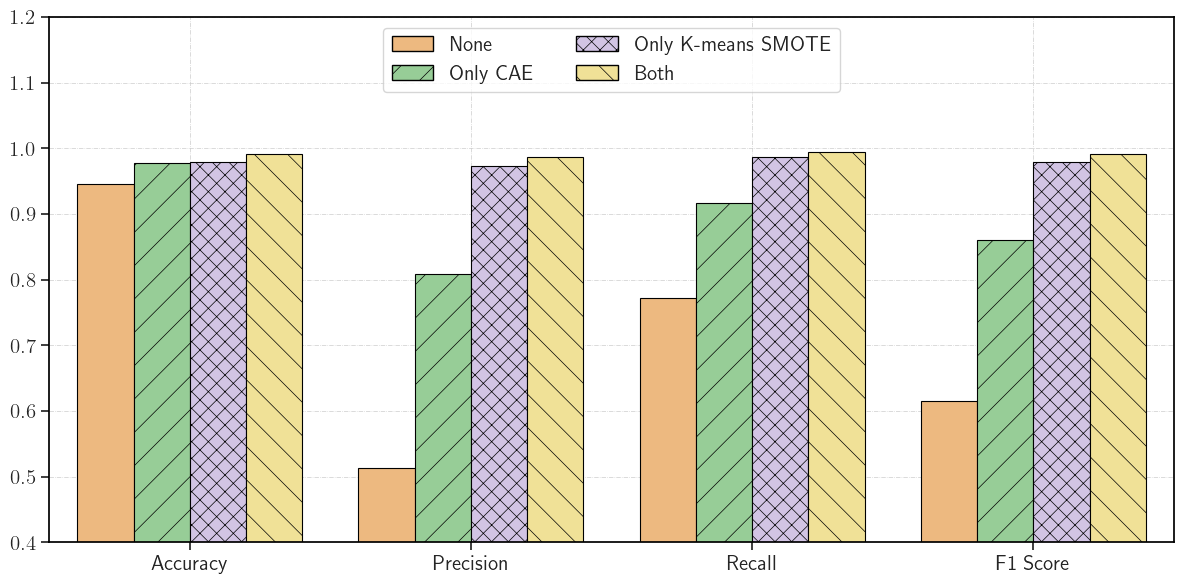

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.patches as mpatches

mpl.rcParams.update(mpl.rcParamsDefault)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.weight": "bold"
})


# Data preparation
data = {
    'Category': ['Accuracy','Precision', 'Recall', 'F1 Score'] * 4,
    'Model': ['None'] * 4 + ['Only CAE'] * 4 + ['Only K-means SMOTE'] * 4 + ['Both'] * 4,
    'Accuracy': [0.946, 0.513, 0.772, 0.616,
                 0.978, 0.809, 0.917, 0.86, 
                 0.980, 0.974, 0.987, 0.98,
                 0.991, 0.987, 0.995, 0.991]
}

df = pd.DataFrame(data)

mpl.rcParams['hatch.linewidth'] = 0.5

custom_palette = sns.color_palette(["#FFBA6E", "#8ED68E", "#D1BEEA", "#FFEB88"])
# custom_palette = sns.color_palette(["#FFBA6E", "#8ED68E", "#D1BEEA", "#FFEB88", "#96B5EC", "#9F749F"])

sns.set_theme(style="ticks")
# Plotting with seaborn and matplotlib
# sns.set_theme(style='whitegrid')
fig, axs = plt.subplots(1, 1, figsize=(12, 6), sharey=False)

metrics = ['Accuracy', 'FNR', 'FPR']
hatches = ['', '/', 'xx', '\\', '-', '+']
models = df['Model'].unique()
model_to_hatch = dict(zip(models, hatches))

sns.barplot(x='Category', y=metrics[0], hue='Model', data=df, ax=axs, edgecolor='black', linewidth=0.8, palette=custom_palette)
    
for i, patch in enumerate(axs.patches):
    # Determine the model associated with the current patch
    model_index = i // len(df['Category'].unique())
    if model_index >= len(models):
        continue
    model_name = models[model_index]
    patch.set_hatch(model_to_hatch[model_name])

# Set the color of the subplot borders to black
for spine in axs.spines.values():
    spine.set_color('black')

# ax.set_title(metric)
axs.set_ylim(0.4, 1.2)
# axs.set_title(r'\textbf{Ablation experiments on SGCC dataset}', fontsize=18, pad=20)
axs.set_xlabel('', fontsize=18)
# axs.set_ylabel(r'\textbf{{{}}}'.format(metric), fontsize=18)
axs.set_ylabel('', fontsize=18)

# Increase the font size of the tick labels
axs.tick_params(axis='both', labelsize=15)

# Create a custom legend for the current subplot
handles, labels = axs.get_legend_handles_labels()
new_handles = []
for handle, label in zip(handles, labels):
    for model, hatch in model_to_hatch.items():
        if model in label:
            new_handles.append(mpatches.Patch(facecolor=handle.get_facecolor(), hatch=hatch, label=label, edgecolor='black'))
axs.legend(handles=new_handles, loc='upper center', ncol=2, fontsize=15)

# for ax, metric in zip(axs, metrics):
#     sns.barplot(x='Category', y=metric, hue='Model', data=df, ax=ax, edgecolor='black', linewidth=0.8, palette=custom_palette)
    
#     for i, patch in enumerate(ax.patches):
#         # Determine the model associated with the current patch
#         model_index = i // len(df['Category'].unique())
#         if model_index >= len(models):
#             continue
#         model_name = models[model_index]
#         patch.set_hatch(model_to_hatch[model_name])
    
#     # Set the color of the subplot borders to black
#     for spine in ax.spines.values():
#         spine.set_color('black')
    
#     # ax.set_title(metric)
#     ax.set_ylim(0, 1.2)
#     ax.set_xlabel(r'\textbf{SGCC Dataset}', fontsize=18)
#     ax.set_ylabel(r'\textbf{{{}}}'.format(metric), fontsize=18)
    
#     # Increase the font size of the tick labels
#     ax.tick_params(axis='both', labelsize=15)
    
#     # Create a custom legend for the current subplot
#     handles, labels = ax.get_legend_handles_labels()
#     new_handles = []
#     for handle, label in zip(handles, labels):
#         for model, hatch in model_to_hatch.items():
#             if model in label:
#                 new_handles.append(mpatches.Patch(facecolor=handle.get_facecolor(), hatch=hatch, label=label, edgecolor='black'))
#     ax.legend(handles=new_handles, loc='upper center', ncol=2, fontsize=15)
plt.grid(True, linestyle='-.', linewidth=0.5)

plt.tight_layout()
plt.show()

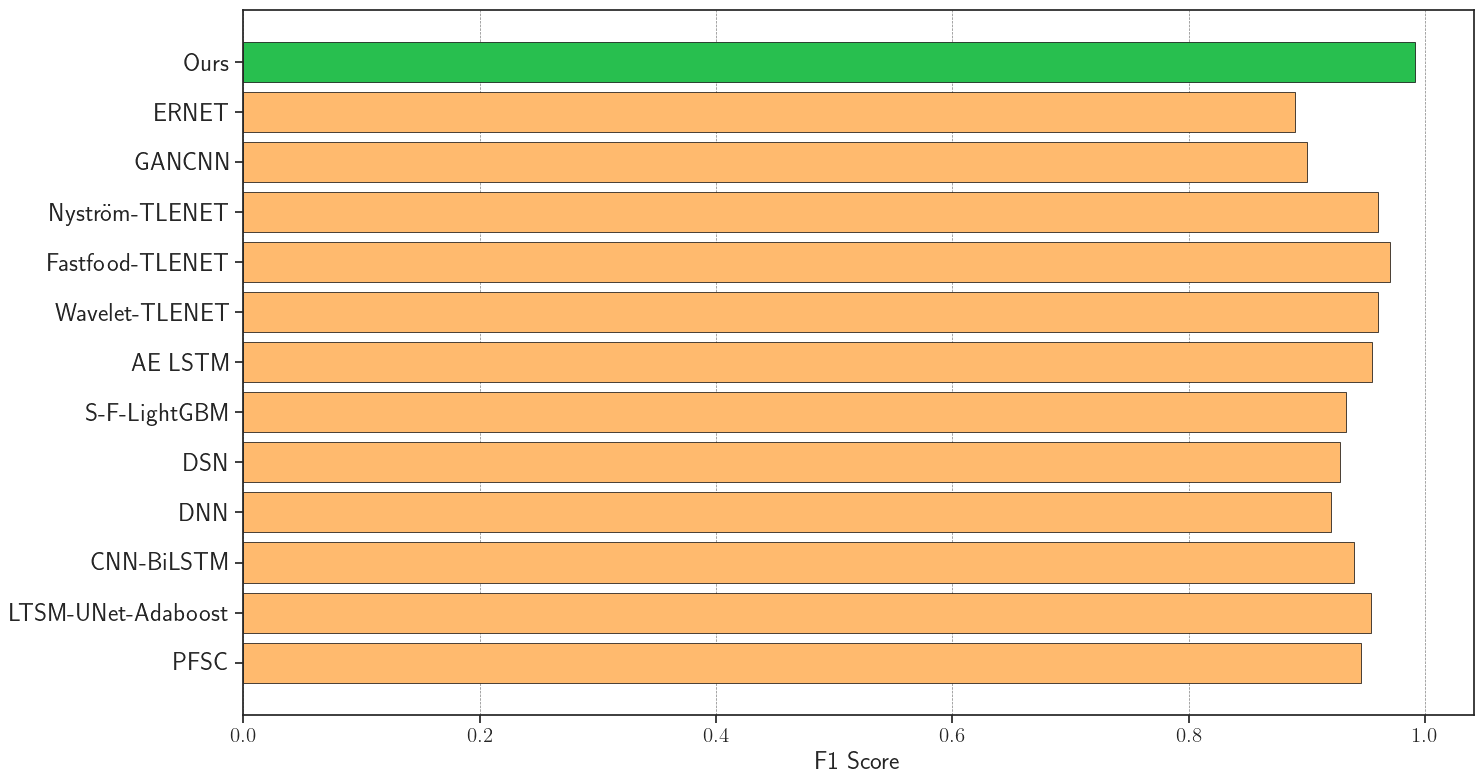

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
models = [
    "PFSC", "LTSM-UNet-Adaboost", "CNN-BiLSTM", "DNN", "DSN", 
    "STL-FractalNet-LightGBM", "AE LSTM", "Wavelet-TLENET", 
    "Fastfood-TLENET", "Nyström-TLENET", "GANCNN", "ERNET", "Ours"
]

f1_scores = [
    0.946, 0.954, 0.94, 0.92, 0.928, 0.933, 0.955, 0.96, 0.97, 0.96, 0.90, 0.89, 0.9918
]

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(15, 8))
bar_positions = np.arange(len(models))
bars = ax.barh(bar_positions, f1_scores, color='#FFBA6E', edgecolor='black', linewidth=0.5)
# Change the color of the "Ours" bar
for bar, model in zip(bars, models):
    if model == "Ours":
        bar.set_color('#28BF4F')
        bar.set_edgecolor('black')
ax.set_yticks(bar_positions)
ax.set_yticklabels(models, fontsize=18)
ax.set_xlabel('F1 Score', fontsize=18)
ax.set_title('')

ax.tick_params(axis='x', labelsize=15)

ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', axis='x')

# Display the chart
plt.tight_layout()
plt.show()


In [65]:
i // len(df['Category'].unique())

4

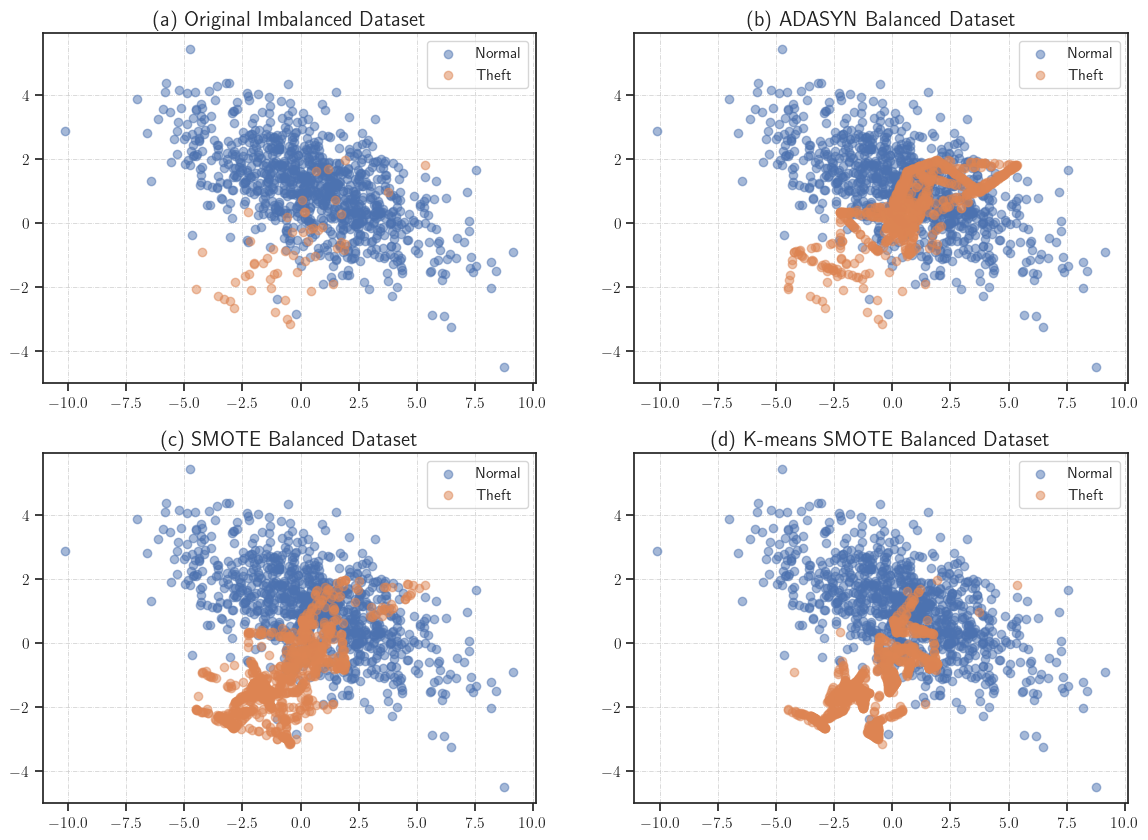

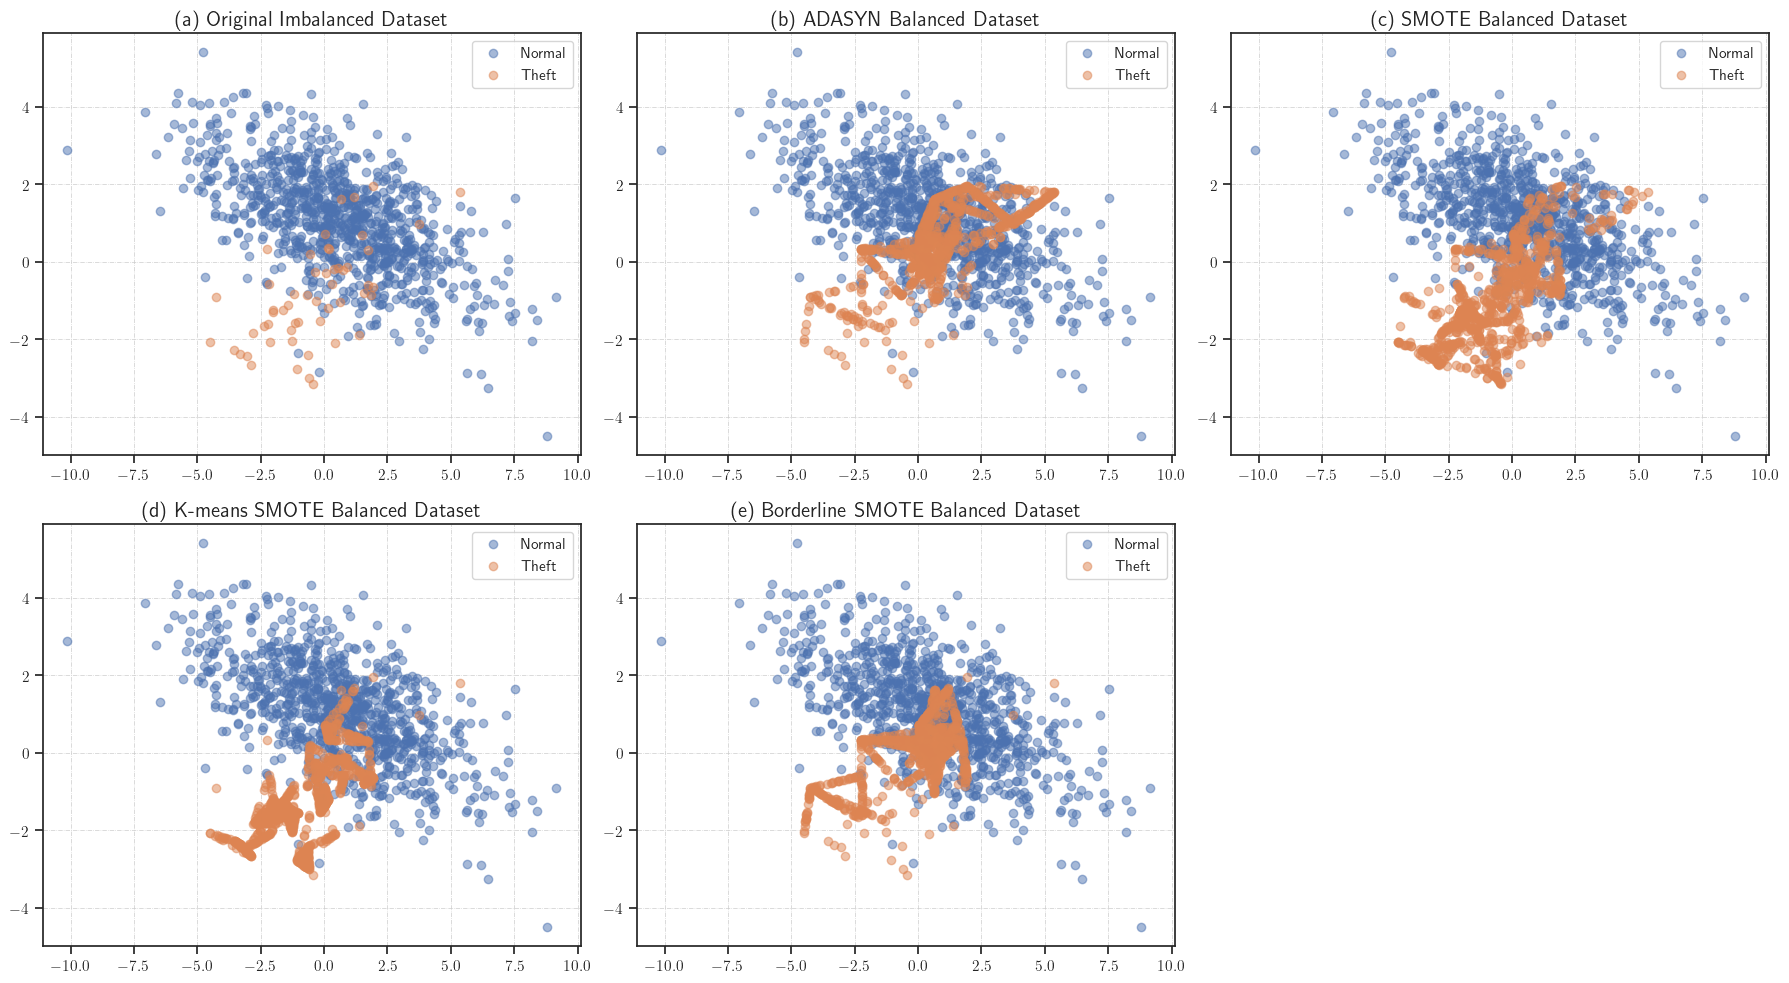

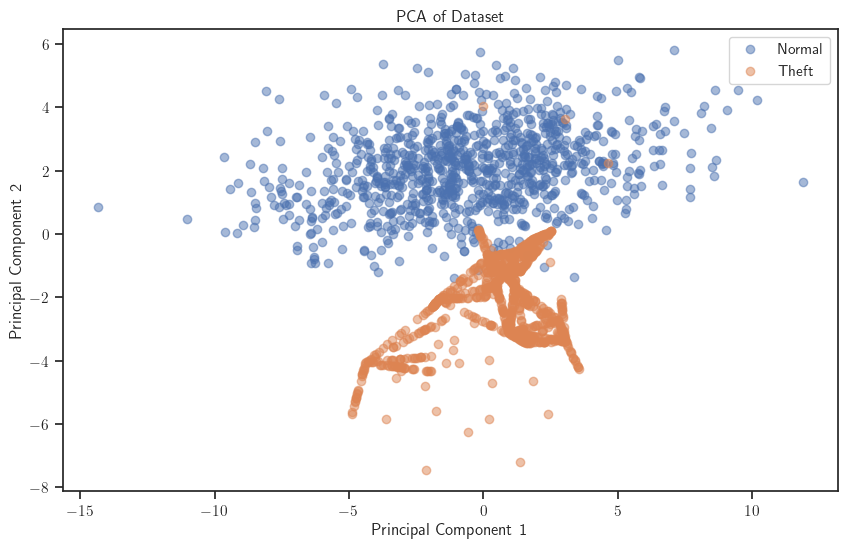

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles, make_blobs, make_moons
from imblearn.over_sampling import ADASYN, SMOTE, KMeansSMOTE, BorderlineSMOTE
from sklearn.cluster import MiniBatchKMeans


random_state = 42

# Generate an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=7, n_redundant=2,
                           n_clusters_per_class=1, weights=[0.95, 0.05], flip_y=0.01, random_state=42)

# X = train_data_reduced.iloc[:, :-3]
# y = train_data_reduced['label']

select_feature = 5

# Function to plot the dataset
def plot_dataset(ax, X, y, title):
    ax.scatter(X[y == 0][:, 0], X[y == 0][:, select_feature], label='Normal', alpha=0.5)
    ax.scatter(X[y == 1][:, 0], X[y == 1][:, select_feature], label='Theft', alpha=0.5)
    ax.set_title(title, fontsize=15)
    ax.legend()

# Create a figure with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot the original imbalanced dataset
plot_dataset(axs[0, 0], X, y, '(a) Original Imbalanced Dataset')
axs[0, 0].grid(True, linestyle='-.', linewidth=0.5)

# Apply ADASYN
adasyn = ADASYN(random_state=random_state)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)
plot_dataset(axs[0, 1], X_adasyn, y_adasyn, '(b) ADASYN Balanced Dataset')
axs[0, 1].grid(True, linestyle='-.', linewidth=0.5)

# Apply SMOTE
smote = SMOTE(random_state=random_state)
X_smote, y_smote = smote.fit_resample(X, y)
plot_dataset(axs[1, 0], X_smote, y_smote, '(c) SMOTE Balanced Dataset')
axs[1, 0].grid(True, linestyle='-.', linewidth=0.5)

# Apply KMeans SMOTE
kmeans_smote = KMeansSMOTE(kmeans_estimator=MiniBatchKMeans(n_clusters=120, n_init=1, random_state=random_state), cluster_balance_threshold=1, random_state=random_state)
X_kmeans_smote, y_kmeans_smote = kmeans_smote.fit_resample(X, y)
plot_dataset(axs[1, 1], X_kmeans_smote, y_kmeans_smote, '(d) K-means SMOTE Balanced Dataset')
axs[1, 1].grid(True, linestyle='-.', linewidth=0.5)

# Apply Borderline SMOTE
borderline_smote = BorderlineSMOTE(random_state=random_state)
X_borderline, y_borderline = borderline_smote.fit_resample(X, y)
# Add a subplot for Borderline SMOTE
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Plot the original imbalanced dataset
plot_dataset(axs[0, 0], X, y, '(a) Original Imbalanced Dataset')
axs[0, 0].grid(True, linestyle='-.', linewidth=0.5)

# Apply ADASYN
plot_dataset(axs[0, 1], X_adasyn, y_adasyn, '(b) ADASYN Balanced Dataset')
axs[0, 1].grid(True, linestyle='-.', linewidth=0.5)

# Apply SMOTE
plot_dataset(axs[0, 2], X_smote, y_smote, '(c) SMOTE Balanced Dataset')
axs[0, 2].grid(True, linestyle='-.', linewidth=0.5)

# Apply KMeans SMOTE
plot_dataset(axs[1, 0], X_kmeans_smote, y_kmeans_smote, '(d) K-means SMOTE Balanced Dataset')
axs[1, 0].grid(True, linestyle='-.', linewidth=0.5)

# Apply Borderline SMOTE
# X_borderline, y_borderline = borderline_smote.fit_resample(X, y)
plot_dataset(axs[1, 1], X_borderline, y_borderline, '(e) Borderline SMOTE Balanced Dataset')
axs[1, 1].grid(True, linestyle='-.', linewidth=0.5)

# Hide the last subplot
axs[1, 2].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

# import seaborn as sns
# import pandas as pd

# # Convert the dataset to a DataFrame
# df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(X.shape[1])])
# df['Label'] = y

# # Plot pairwise relationships
# sns.pairplot(df, hue='Label', diag_kind='kde', markers=["o", "s"])
# plt.show()


import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA to reduce the dataset to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_borderline)

# Plot the PCA-transformed data
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[y_borderline == 0, 0], X_pca[y_borderline == 0, 1], label='Normal', alpha=0.5)
plt.scatter(X_pca[y_borderline == 1, 0], X_pca[y_borderline == 1, 1], label='Theft', alpha=0.5)
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

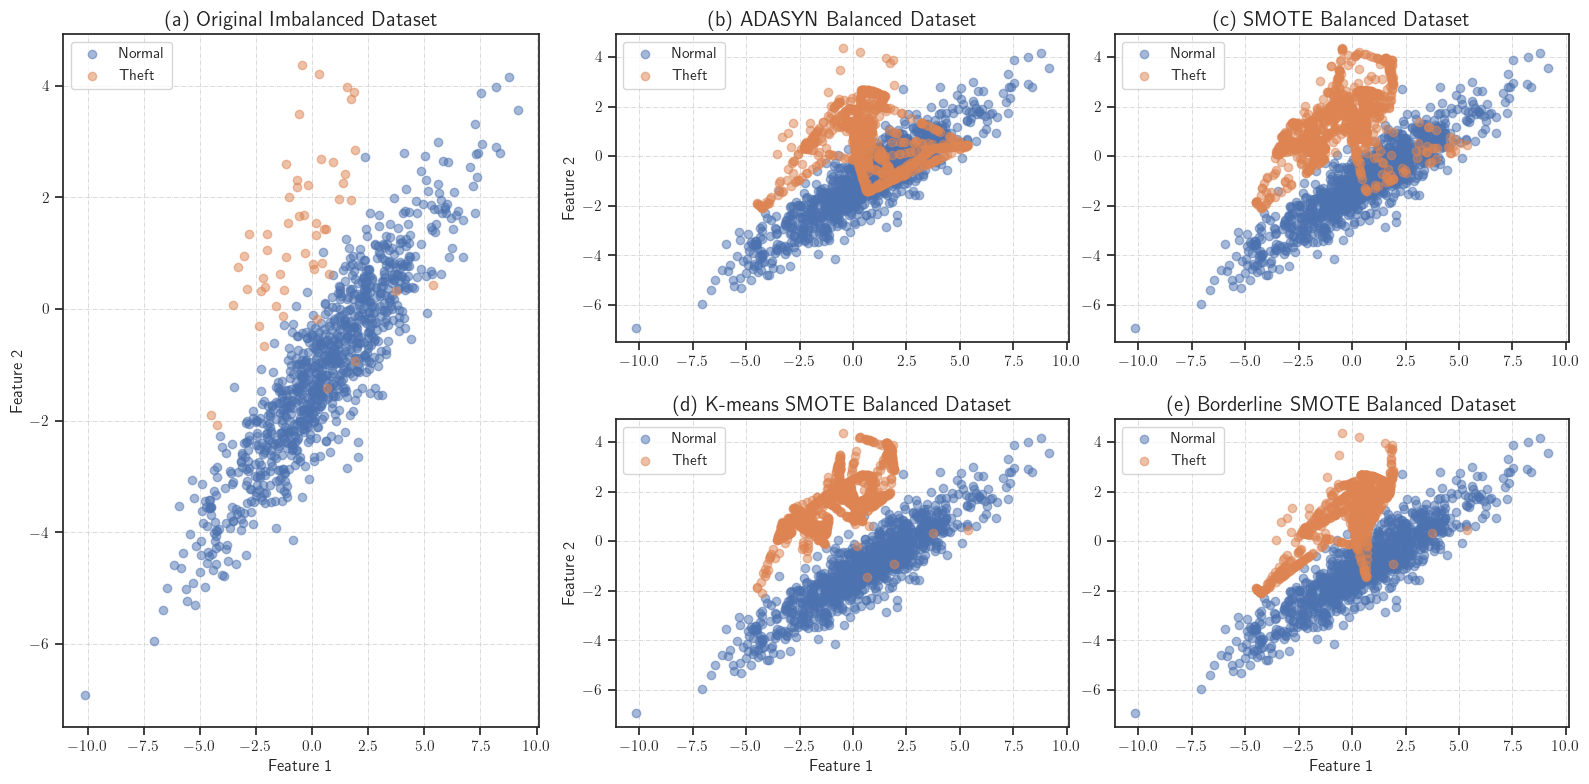

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN, SMOTE, KMeansSMOTE, BorderlineSMOTE
from sklearn.cluster import MiniBatchKMeans

random_state = 42

# Generate an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=7, n_redundant=2,
                           n_clusters_per_class=1, weights=[0.95, 0.05], flip_y=0.01, random_state=42)

# Apply oversampling techniques
adasyn = ADASYN(random_state=random_state)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

smote = SMOTE(random_state=random_state)
X_smote, y_smote = smote.fit_resample(X, y)

kmeans_smote = KMeansSMOTE(kmeans_estimator=MiniBatchKMeans(n_clusters=120, n_init=1, random_state=random_state),
                            cluster_balance_threshold=0.1, random_state=random_state)
X_kmeans_smote, y_kmeans_smote = kmeans_smote.fit_resample(X, y)

borderline_smote = BorderlineSMOTE(random_state=random_state)
X_borderline, y_borderline = borderline_smote.fit_resample(X, y)

select_feature = 1

# Function to plot the dataset
def plot_dataset(ax, X, y, title, xlabel=True, ylabel=True):
    ax.scatter(X[y == 0][:, 0], X[y == 0][:, select_feature], label='Normal', alpha=0.5)
    ax.scatter(X[y == 1][:, 0], X[y == 1][:, select_feature], label='Theft', alpha=0.5)
    ax.set_title(title, fontsize=15)
    ax.legend()
    if xlabel:
        ax.set_xlabel('Feature 1')
    if ylabel:
        ax.set_ylabel('Feature 2')
    ax.grid(True, linestyle='-.', linewidth=0.5)

# Create a figure with main GridSpec layout
fig = plt.figure(figsize=(16, 8))
gs_main = GridSpec(nrows=2, ncols=2, width_ratios=[1, 2], height_ratios=[1, 1])

# Left plot spanning both rows in column 0
ax_left = fig.add_subplot(gs_main[:, 0])
plot_dataset(ax_left, X, y, '(a) Original Imbalanced Dataset', xlabel=True, ylabel=True)

# Create a sub-GridSpec for the right column (column 1)
gs_right = GridSpecFromSubplotSpec(nrows=2, ncols=2, subplot_spec=gs_main[:, 1], hspace=0.25, wspace=0.1)

# Right column plots in a 2x2 grid
ax_adasyn = fig.add_subplot(gs_right[0, 0])
plot_dataset(ax_adasyn, X_adasyn, y_adasyn, '(b) ADASYN Balanced Dataset', xlabel=False, ylabel=True)

ax_smote = fig.add_subplot(gs_right[0, 1])
plot_dataset(ax_smote, X_smote, y_smote, '(c) SMOTE Balanced Dataset', xlabel=False, ylabel=False)

ax_kmeans = fig.add_subplot(gs_right[1, 0])
plot_dataset(ax_kmeans, X_kmeans_smote, y_kmeans_smote, '(d) K-means SMOTE Balanced Dataset', xlabel=True, ylabel=True)

ax_borderline = fig.add_subplot(gs_right[1, 1])
plot_dataset(ax_borderline, X_borderline, y_borderline, '(e) Borderline SMOTE Balanced Dataset', xlabel=True, ylabel=False)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [34]:
df_test = pd.DataFrame(X)
df_test_label = pd.DataFrame(y)
df_full = pd.concat([df_test, df_test_label], axis=1)
df_full

,0,1,2,3,4,5,6,7,8,9,0
0,-0.571896,-1.167661,1.997903,0.487444,0.631138,-0.322140,-1.791695,-2.194487,-0.420857,-0.198183,0
1,-2.439401,-2.002681,0.810641,0.189199,0.513228,0.598812,-2.153101,-2.618590,-1.019628,0.620606,0
2,-0.581094,-0.978326,0.911322,0.856420,0.942644,-0.117675,-1.703802,-2.163532,0.152567,1.852597,0
3,-2.880645,0.359138,-0.820955,0.775790,-3.224618,-2.663698,-0.093912,4.174329,0.802689,0.593949,1
4,0.350712,-0.568179,-0.865014,3.652466,0.397711,1.994577,-0.878319,-2.800095,2.116387,-0.227354,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1.253853,0.005326,0.856353,-0.970215,1.484632,0.179566,-1.535110,-1.628800,1.267229,-1.511139,0
996,2.384105,-1.122416,1.408950,0.099290,1.600101,0.908682,-0.304113,-0.716749,2.529749,-0.705668,0
997,2.586440,0.597409,0.269801,0.152054,2.167694,1.531779,-0.709694,-3.214595,0.884504,-0.069423,0
998,2.581858,0.303376,0.320442,0.627855,1.947959,1.571055,-0.582055,-2.841032,1.409755,-1.086595,0


In [1]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Perform t-SNE to reduce the dataset to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_adasyn)

# Plot the t-SNE-transformed data
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[y_adasyn == 0, 0], X_tsne[y_adasyn == 0, 1], label='Normal', alpha=0.5)
plt.scatter(X_tsne[y_adasyn == 1, 0], X_tsne[y_adasyn == 1, 1], label='Theft', alpha=0.5)
plt.title('t-SNE of Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

NameError: name 'X_adasyn' is not defined

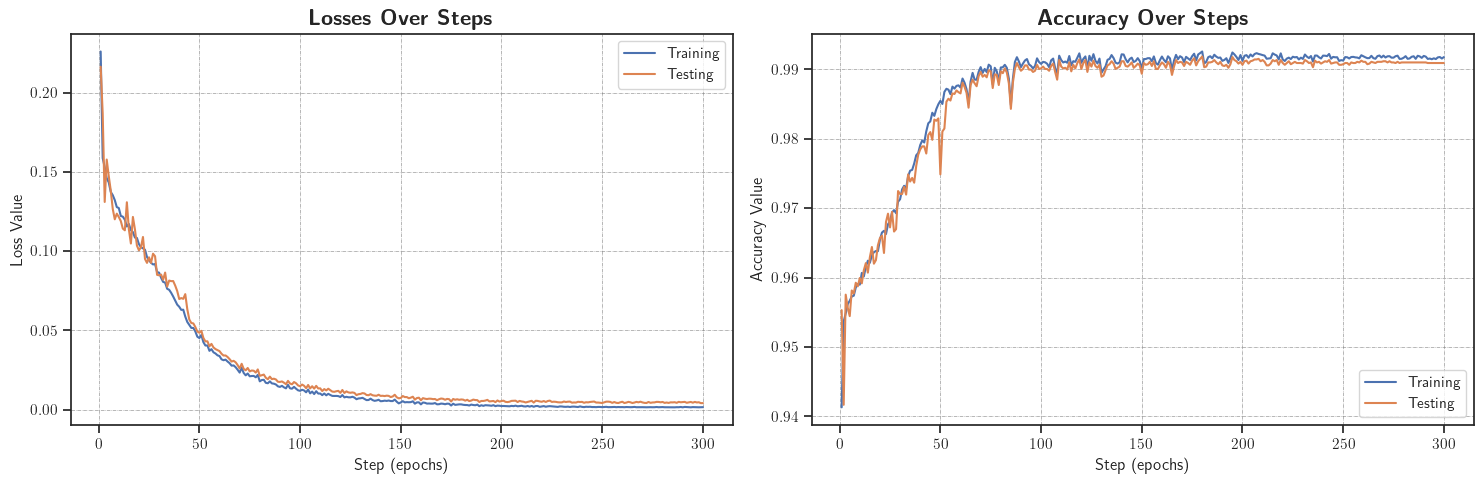

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV files
acc_train = "../log_csv/train_acc2.csv"
acc_test = "../log_csv/test_acc2.csv"

loss_train = "../log_csv/train_loss2.csv"
loss_test = "../log_csv/test_loss2.csv"

loss_train_df = pd.read_csv(loss_train)
loss_val_df = pd.read_csv(loss_test)

acc_train_df = pd.read_csv(acc_train)
acc_val_df = pd.read_csv(acc_test)

# Add a column to distinguish between training and validation data
loss_train_df['Type'] = 'Training'
loss_val_df['Type'] = 'Testing'

acc_train_df['Type'] = 'Training'
acc_val_df['Type'] = 'Testing'

# Concatenate the dataframes
loss_data_combined = pd.concat([loss_train_df, loss_val_df])
acc_data_combined = pd.concat([acc_train_df, acc_val_df])

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot the loss data
sns.lineplot(ax=axes[0], x='Step', y='Value', hue='Type', data=loss_data_combined)
axes[0].set_title(r'\textbf{Losses Over Steps}', fontsize=16)
axes[0].set_xlabel('Step (epochs)')
axes[0].set_ylabel('Loss Value')
axes[0].grid(True, linestyle='-.', linewidth=0.4, color='gray')
axes[0].legend(title='')  # Remove legend title

# Plot the accuracy data
sns.lineplot(ax=axes[1], x='Step', y='Value', hue='Type', data=acc_data_combined)
axes[1].set_title(r'\textbf{Accuracy Over Steps}', fontsize=16)
axes[1].set_xlabel('Step (epochs)')
axes[1].set_ylabel('Accuracy Value')
axes[1].grid(True, linestyle='-.', linewidth=0.4, color='gray')
axes[1].legend(title='', loc='lower right')  # Remove legend title

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

The mode using CAE component
Log mode:  train


/tmp/ipykernel_3044482/3180091924.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('../model/KSM_Bestt/KSM_Bestt_model_179.pth')


TRAIN SIZE: 46642  TEST SIZE: 11660  SIZE: 58302  TRAIN RATIO: 80 %
MODE: cae  INDIR: ../data/ksm_transformer  WINDOW SIZE: 37  EPOCH: 300  BATCH SIZE: 32  LR: 0.0001
finish load data


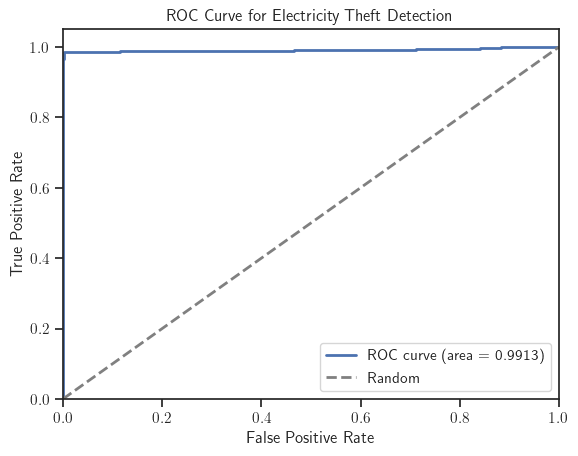

In [19]:
from config import Config, prepare_fin, parser_process
from data_loader import data_preparing
from sklearn.metrics import roc_curve, roc_auc_score, auc, confusion_matrix
import torch

def draw_confusion(label_y, pre_y):
    cm = confusion_matrix(label_y, pre_y)
    # Calculate the confusion matrix

    # Print False Negatives for each class
    print("False Negatives for each class:")
    for i, label in enumerate(set(label_y)):
        false_negatives = sum(cm[i, :]) - cm[i, i]
        true_positives = cm[i, i]
        if (false_negatives + true_positives) > 0:
            fnr = false_negatives / (false_negatives + true_positives)
        else:
            fnr = 0.0
        print(f"Class {label}: {fnr:.4f}")
    print(cm)

# Process arguments
args = parser_process()
config = Config(args)

model = torch.load('../model/KSM_Bestt/KSM_Bestt_model_179.pth')
config.root_dir = '../data/ksm_transformer_best_result/'

# print(model)

train_loader, test_loader = data_preparing(config, args)

model.eval()
label_y = []
pre_y = []
prob_y = []
with torch.no_grad():
    for j, test_sample_batch in enumerate(test_loader):
        test_data = test_sample_batch['data'].type(torch.FloatTensor).to(config.device)
        test_label = test_sample_batch['label'].to(config.device)
        
        test_out = model(test_data)
        
        pre_y = np.concatenate([pre_y, torch.max(test_out, 1)[1].cpu().numpy()], 0)
        prob_y = np.concatenate([prob_y, torch.max(test_out, 1)[0].cpu().numpy()], 0)
        label_y = np.concatenate([label_y, test_label.cpu().numpy()], 0)
        
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(label_y, prob_y)
    # Calculate AUC score
    roc_auc = auc(fpr, tpr)
    # draw_confusion(label_y, pre_y)
    
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Electricity Theft Detection')
    plt.legend(loc="lower right")
    plt.show()

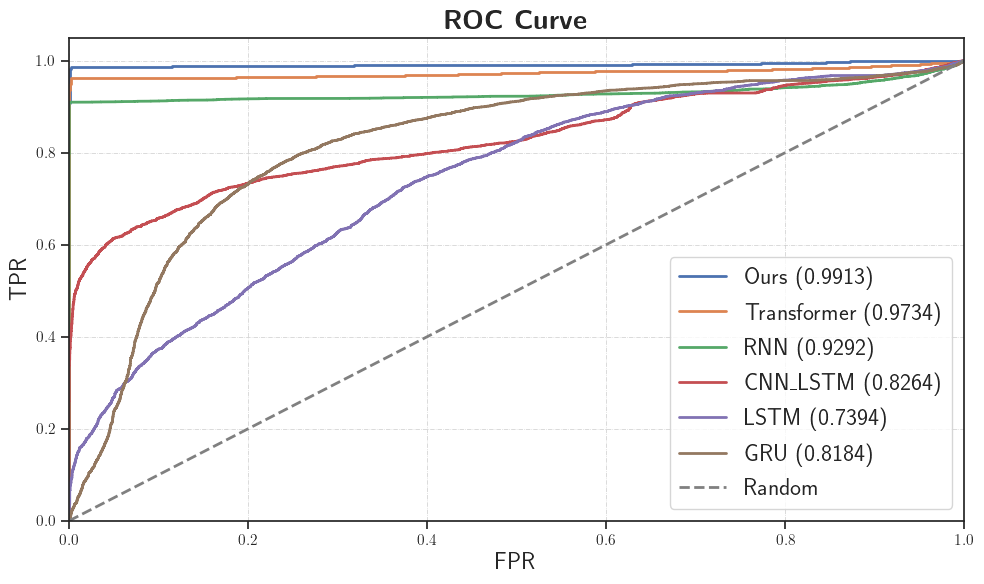

In [42]:
%matplotlib inline

metrics_list = ['Ours', 'Transformer', 'RNN', 'CNN_LSTM', 'LSTM', 'GRU']

def load_metrics(metric):
    data = np.load(f'../metrics/{metric}_metrics.npz')
    fpr = data['fpr']
    tpr = data['tpr']
    roc_auc = data['roc_auc']
    return fpr, tpr, roc_auc

# Plot ROC curve for each model
plt.figure(figsize=(10, 6))
for metric in metrics_list:
    fpr, tpr, roc_auc = load_metrics(metric.lower())
    plt.plot(fpr, tpr, lw=2, label=f'{metric} ({roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR', fontsize=17)
plt.ylabel('TPR', fontsize=17)
plt.title(r'\textbf{ROC Curve}', fontsize=20)
plt.legend(loc="lower right", fontsize=17)

plt.grid(True, linestyle='-.', linewidth=0.5)


plt.tight_layout()
plt.show()

In [ ]:
import torch.nn as nn
from config import Config, prepare_fin, parser_process
from data_loader import data_preparing
from sklearn.metrics import roc_curve, roc_auc_score, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import torch
import time

def draw_confusion(label_y, pre_y):
    cm = confusion_matrix(label_y, pre_y)
    # Calculate the confusion matrix

    # Print False Negatives for each class
    print("False Negatives for each class:")
    for i, label in enumerate(set(label_y)):
        false_negatives = sum(cm[i, :]) - cm[i, i]
        true_positives = cm[i, i]
        if (false_negatives + true_positives) > 0:
            fnr = false_negatives / (false_negatives + true_positives)
        else:
            fnr = 0.0
        print(f"Class {label}: {fnr:.4f}")
    print(cm)

class CNN_LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers):
        super(CNN_LSTM, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv1d(in_channels=input_dim, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2)
        )
        self.lstm = nn.LSTM(input_size=64, hidden_size=hidden_dim, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.cnn(x)
        x = x.permute(0, 2, 1)
        x, _ = self.lstm(x)
        x = self.fc(x[:, -1, :])
        return x
    
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size=input_dim, hidden_size=hidden_dim, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x, _ = self.lstm(x)
        x = self.fc(x[:, -1, :])
        return x
    
class RNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(input_size=input_dim, hidden_size=hidden_dim, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x, _ = self.rnn(x)
        x = self.fc(x[:, -1, :])
        return x
    
class GRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers):
        super(GRU, self).__init__()
        self.gru = nn.GRU(input_size=input_dim, hidden_size=hidden_dim, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x, _ = self.gru(x)
        x = self.fc(x[:, -1, :])
        return x
    
def train_model(model, train_loader, criterion, optimizer, num_epochs, test_loader):
    for epoch in range(num_epochs):
        model.train()
        start = time.time()
        for batch in train_loader:
            data = batch['data'].type(torch.FloatTensor).to(config.device)
            labels = batch['label'].to(config.device)

            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        
        end = time.time()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Time: {end-start:.4f}')
        if epoch % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        
        evaluate_model(model, test_loader)
        
def evaluate_model(model, test_loader):
    model.eval()
    label_y = []
    pre_y = []
    prob_y = []
    start = time.time()
    with torch.no_grad():
        for batch in test_loader:
            data = batch['data'].type(torch.FloatTensor).to(config.device)
            labels = batch['label'].to(config.device)
            
            outputs = model(data)
            
            pre_y = np.concatenate([pre_y, torch.max(outputs, 1)[1].cpu().numpy()], 0)
            prob_y = np.concatenate([prob_y, torch.max(outputs, 1)[0].cpu().numpy()], 0)
            label_y = np.concatenate([label_y, labels.cpu().numpy()], 0)
    
    end = time.time()
    print(f'Evaluation Time: {end-start:.4f}')     
    fpr, tpr, thresholds = roc_curve(label_y, prob_y)
    roc_auc = auc(fpr, tpr)
    
    # Calculate accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(label_y, pre_y)
    precision = precision_score(label_y, pre_y, average='weighted')
    recall = recall_score(label_y, pre_y, average='weighted')
    f1 = f1_score(label_y, pre_y, average='weighted')
    
    # Print the metrics
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    
    draw_confusion(label_y, pre_y)
    
    return fpr, tpr, roc_auc

import matplotlib.pyplot as plt

# model.eval()
# label_y = []
# pre_y = []
# prob_y = []
# with torch.no_grad():
#     for j, test_sample_batch in enumerate(test_loader):
#         test_data = test_sample_batch['data'].type(torch.FloatTensor).to(config.device)
#         test_label = test_sample_batch['label'].to(config.device)
        
#         test_out = model(test_data)
        
#         pre_y = np.concatenate([pre_y, torch.max(test_out, 1)[1].cpu().numpy()], 0)
#         prob_y = np.concatenate([prob_y, torch.max(test_out, 1)[0].cpu().numpy()], 0)
#         label_y = np.concatenate([label_y, test_label.cpu().numpy()], 0)
        
#     # Calculate ROC curve
#     fpr, tpr, thresholds = roc_curve(label_y, prob_y)
#     # Calculate AUC score
#     roc_auc = auc(fpr, tpr)
#     draw_confusion(label_y, pre_y)

# Define models
cnn_lstm_model = CNN_LSTM(input_dim=37, hidden_dim=128, output_dim=2, num_layers=3).to(config.device)
lstm_model = LSTM(input_dim=37, hidden_dim=128, output_dim=2, num_layers=3).to(config.device)
rnn_model = RNN(input_dim=37, hidden_dim=128, output_dim=2, num_layers=3).to(config.device)
gru_model = GRU(input_dim=37, hidden_dim=128, output_dim=2, num_layers=3).to(config.device)

# Train models
criterion = nn.CrossEntropyLoss()
print('\nTraining CNN-LSTM model...')
optimizer = torch.optim.Adam(cnn_lstm_model.parameters(), lr=0.0001)
train_model(cnn_lstm_model, train_loader, criterion, optimizer, 2, test_loader)
fpr_cnn_lstm, tpr_cnn_lstm, roc_auc_cnn_lstm = evaluate_model(cnn_lstm_model, test_loader)
np.savez('../metrics/cnn_lstm_metrics.npz', fpr=fpr_cnn_lstm, tpr=tpr_cnn_lstm, roc_auc=roc_auc_cnn_lstm)

print('\nTraining LSTM model...')
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.0001)
train_model(lstm_model, train_loader, criterion, optimizer, 2, test_loader)
fpr_lstm, tpr_lstm, roc_auc_lstm = evaluate_model(lstm_model, test_loader)
np.savez('../metrics/lstm_metrics.npz', fpr=fpr_lstm, tpr=tpr_lstm, roc_auc=roc_auc_lstm)

print('\nTraining RNN model...')
optimizer = torch.optim.Adam(rnn_model.parameters(), lr=0.0001)
train_model(rnn_model, train_loader, criterion, optimizer, 2, test_loader)
fpr_rnn, tpr_rnn, roc_auc_rnn = evaluate_model(rnn_model, test_loader)
np.savez('../metrics/rnn_metrics.npz', fpr=fpr_rnn, tpr=tpr_rnn, roc_auc=roc_auc_rnn)

print('\nTraining GRU model...')
optimizer = torch.optim.Adam(gru_model.parameters(), lr=0.0001)
train_model(gru_model, train_loader, criterion, optimizer, 2, test_loader)
fpr_gru, tpr_gru, roc_auc_gru = evaluate_model(gru_model, test_loader)
np.savez('../metrics/gru_metrics.npz', fpr=fpr_gru, tpr=tpr_gru, roc_auc=roc_auc_gru)


# Plot ROC curves
plt.figure()
plt.plot(fpr, tpr, lw=2, label=f'CAE Transformer (area = {roc_auc:.4f})')
plt.plot(fpr_cnn_lstm, tpr_cnn_lstm, lw=2, label=f'CNN-LSTM (area = {roc_auc_cnn_lstm:.4f})')
plt.plot(fpr_lstm, tpr_lstm, lw=2, label=f'LSTM (area = {roc_auc_lstm:.4f})')
plt.plot(fpr_rnn, tpr_rnn, lw=2, label=f'RNN (area = {roc_auc_rnn:.4f})')
plt.plot(fpr_gru, tpr_gru, lw=2, label=f'GRU (area = {roc_auc_gru:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

In [ ]:
%matplotlib inline

metrics_list = ['Ours', 'Transformer', 'RNN', 'CNN_LSTM', 'LSTM', 'GRU']

def load_metrics(metric):
    data = np.load(f'../metrics/{metric}_metrics.npz')
    fpr = data['fpr']
    tpr = data['tpr']
    roc_auc = data['roc_auc']
    return fpr, tpr, roc_auc

# Plot ROC curve for each model
plt.figure(figsize=(10, 6))
for metric in metrics_list:
    fpr, tpr, roc_auc = load_metrics(metric.lower())
    plt.plot(fpr, tpr, lw=2, label=f'{metric} ({roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR', fontsize=17)
plt.ylabel('TPR', fontsize=17)
plt.title(r'\textbf{ROC Curve}', fontsize=20)
plt.legend(loc="lower right", fontsize=17)

plt.grid(True, linestyle='-.', linewidth=0.5)


plt.tight_layout()
plt.show()

In [42]:
from thop import profile
import time 

batch_1 = next(iter(test_loader))

train_batch_1 = next(iter(train_loader))

torch.cuda.empty_cache()

# Move data to the device
test_data_1, label_1 = batch_1['data'], batch_1['label']

train_data_1, train_label_1 = train_batch_1['data'], train_batch_1['label']

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
test_data_1 = test_data_1.to(device)

print('\n\nCNN_LSTM model')
macs, params = profile(cnn_lstm_model, inputs=[test_data_1])
print('MACs (G): ', macs/1000**2)
print('Params (M): ', params/1000**2)

print('\n\nLSTM model')
macs, params = profile(lstm_model, inputs=[test_data_1])
print('MACs (G): ', macs/1000**2)
print('Params (M): ', params/1000**2)

print('\n\nRNN model')
macs, params = profile(rnn_model, inputs=[test_data_1])
print('MACs (G): ', macs/1000**2)
print('Params (M): ', params/1000**2)

print('\n\nGRU model')
macs, params = profile(gru_model, inputs=[test_data_1])
print('MACs (G): ', macs/1000**2)
print('Params (M): ', params/1000**2)



CNN_LSTM model
[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv1d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.pooling.MaxPool1d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register count_lstm() for <class 'torch.nn.modules.rnn.LSTM'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
MACs (G):  170.606592
Params (M):  0.370946


LSTM model
[INFO] Register count_lstm() for <class 'torch.nn.modules.rnn.LSTM'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
MACs (G):  316.08832
Params (M):  0.349954


RNN model
[INFO] Register count_rnn() for <class 'torch.nn.modules.rnn.RNN'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
MACs (G):  78.68416
Params (M):  0.087682


GRU model
[INFO] Register count_gru() for <class 'torch.nn.modules.rnn.GRU'>.
[IN

In [81]:
# Warm up (for more accurate timing)
with torch.no_grad():
    _ = cnn_lstm_model(test_data_1)

# Time the inference
start_time = time.time()
with torch.no_grad():
    _ = cnn_lstm_model(test_data_1)
end_time = time.time()

print(f'Inference time: {end_time - start_time:.4f} seconds')

Inference time: 0.0007 seconds


In [47]:
from transformer_model.old_transformer import TransformerPredictor

args = parser_process()
config = Config(args)

model = TransformerPredictor(config).to(config.device)

print('\n\Transformer model')
macs, params = profile(model, inputs=[test_data_1])
print('MACs (G): ', macs/1000**2)
print('Params (M): ', params/1000**2)

The mode using CAE component
Log mode:  train

\Transformer model
[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv1d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.normalization.LayerNorm'>.
MACs (G):  1586.258176
Params (M):  0.685178


In [55]:
from transformer_model.old_transformer import TransformerPredictor2

args = parser_process()
config = Config(args)

model = TransformerPredictor2(config).to(config.device)

print('\n\Transformer model')
macs, params = profile(model, inputs=[test_data_1])
print('MACs (G): ', macs/1000**2)
print('Params (M): ', params/1000**2)

from torchsummary import summary

summary(model, (37, 28))

Not using
Log mode:  train

\Transformer model
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.normalization.LayerNorm'>.
MACs (G):  952.392448
Params (M):  0.81819
Layer (type:depth-idx)                        Output Shape              Param #
├─PositionalEncoding: 1-1                     [-1, 2, 28]               --
|    └─Dropout: 2-1                           [-1, 2, 28]               --
├─TransformerEncoder: 1-2                     [-1, 2, 28]               --
|    └─ModuleList: 2                          []                        --
|    |    └─TransformerEncoderLayer: 3-1      [-1, 2, 28]               120,124
|    |    └─TransformerEncoderLayer: 3-2      [-1, 2, 28]               120,124
|    |    └─TransformerEncoderLayer: 3-3      [-1, 2, 28]               120,124
|    |    └─TransformerEncoderLayer: 3-4    

/home/tiendat/miniconda3/envs/torchtf/lib/python3.9/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [13]:
import shap
import torch
import torch.nn as nn
import numpy as np

seed = 40
np.random.seed(seed)
torch.manual_seed(seed)

# Prepare data for SHAP
batch_1 = next(iter(test_loader))
batch_2 = next(iter(test_loader))
batch_3 = next(iter(test_loader))

train_batch_1 = next(iter(train_loader))
train_batch_2 = next(iter(train_loader))
train_batch_3 = next(iter(train_loader))

torch.cuda.empty_cache()

model = torch.load('../model/KSM_Bestt/KSM_Bestt_model_179.pth').to(config.device)
model.eval()

# Move data to the device
test_data_1, label_1 = batch_1['data'], batch_1['label']
test_data_2, label_2 = batch_2['data'], batch_2['label']
test_data_3, label_3 = batch_3['data'], batch_3['label']

train_data_1, train_label_1 = train_batch_1['data'], train_batch_1['label']
train_data_2, train_label_2 = train_batch_2['data'], train_batch_2['label']
train_data_3, train_label_3 = train_batch_3['data'], train_batch_3['label']

# background = test_data[:30].to(config.device)
# test_data = test_data[30:].to(config.device)

# Ensure test_data requires grad
test_data_1 = test_data_1.to(config.device)
test_data_1.requires_grad_(True)
test_data_2 = test_data_2.to(config.device)
test_data_2.requires_grad_(True)
test_data_3 = test_data_3.to(config.device)
test_data_3.requires_grad_(True)

train_data_1 = train_data_1.to(config.device)
train_data_1.requires_grad_(True)
train_data_2 = train_data_2.to(config.device)
train_data_2.requires_grad_(True)
train_data_3 = train_data_3.to(config.device)
train_data_3.requires_grad_(True)

# Create SHAP explainer with the model and background data
e_1 = shap.DeepExplainer(model, train_data_1)
e_2 = shap.DeepExplainer(model, train_data_2)
e_3 = shap.DeepExplainer(model, train_data_3)

e_g = shap.GradientExplainer(model, train_data_1)

# Compute SHAP values for the test data
shap_values_1 = e_1.shap_values(test_data_1, check_additivity=False)
shap_values_2 = e_2.shap_values(test_data_2, check_additivity=False)
shap_values_3 = e_3.shap_values(test_data_3, check_additivity=False)

shap_values_g = e_g.shap_values(test_data_1)

# Ensure test_data is a numpy array and reshape if necessary
# test_data_np = test_data.detach().cpu().numpy()
# if test_data_np.ndim == 1:
#     test_data_np = test_data_np.reshape(1, -1)
# elif test_data_np.ndim > 2:
#     test_data_np = test_data_np.reshape(test_data_np.shape[0], -1)
    
# feature_names = [f"Day {i}" for i in range(1, 1037)]

# # Feature index or name
# feature = 0  # Or 'feature1'

# shap.dependence_plot(
#     feature,
#     shap_values,
#     test_data_np,
#     feature_names=feature_names
# )

# shap_values_array = np.array(shap_values) if isinstance(shap_values, list) else shap_values

# shap.summary_plot(
#     shap_values_array,
#     test_data_np,
#     plot_type="layered_violin",
#     feature_names=feature_names
# )


/tmp/ipykernel_749743/2359250871.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('../model/KSM_Bestt/KSM_Bestt_model_179.pth').to(config.device)
/hom

(32, 37, 28, 2)


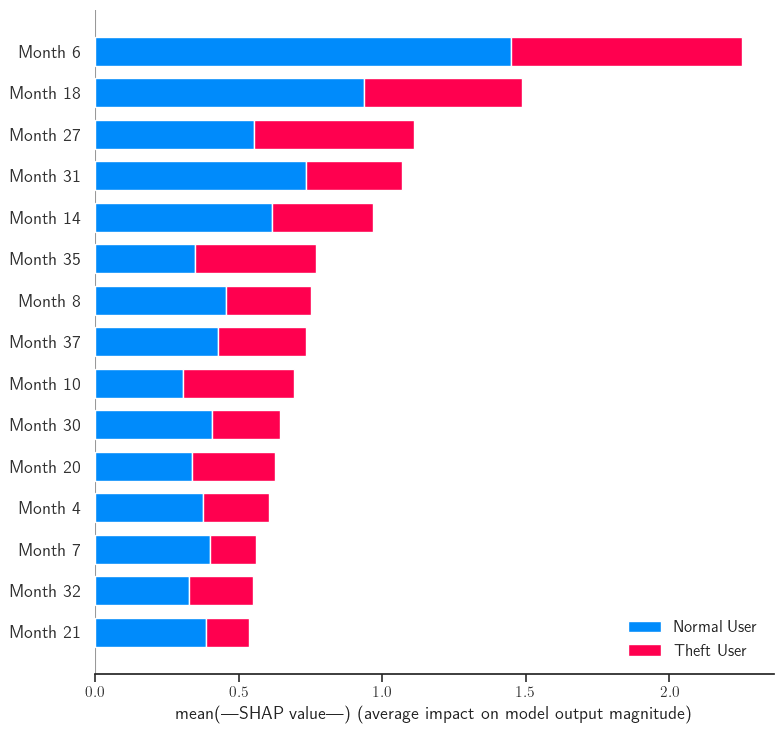

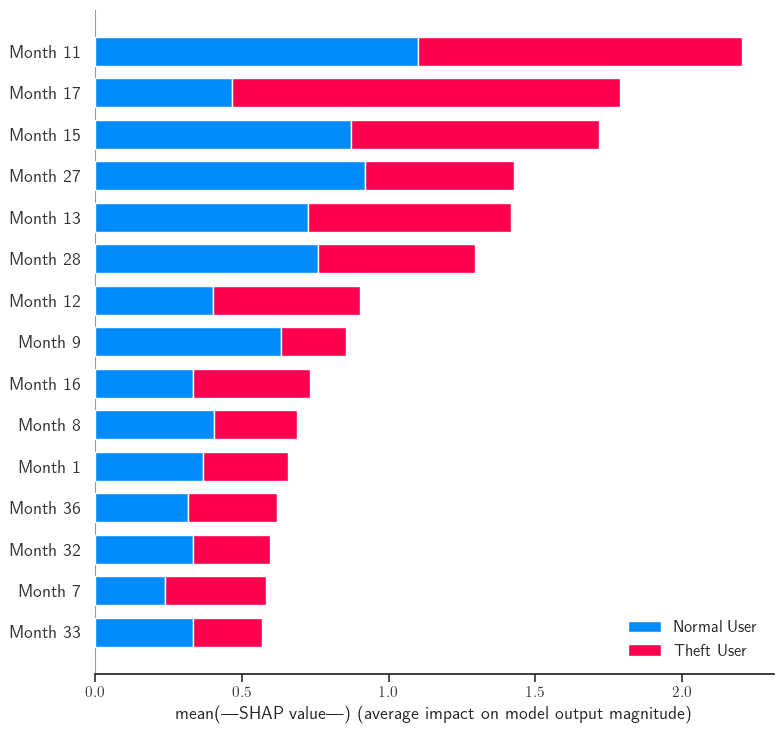

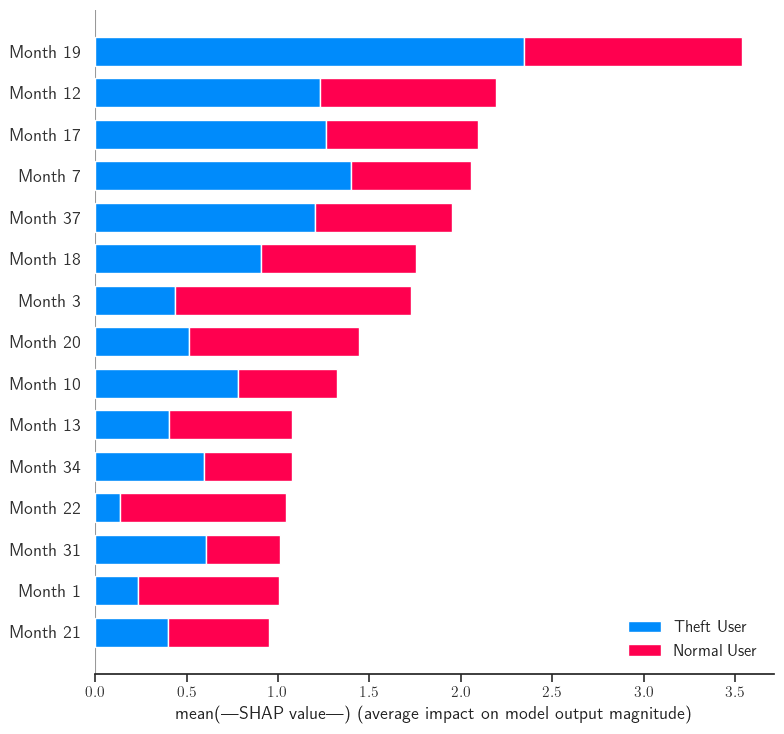

In [14]:
feature_names = [f"Day {i}" for i in range(1, 1037)]

month_features = [f"Month {i}" for i in range(1, 38)]

print(shap_values_1.shape)

# shap.summary_plot([shap_values[0][i] for i in range(37)], feature_names = feature_names)
# shap.summary_plot(shap_values[0], feature_names = month_features)
mean_shap_values_1 = np.mean(shap_values_1, axis=0)
mean_shap_values_2 = np.mean(shap_values_2, axis=0)
mean_shap_values_3 = np.mean(shap_values_3, axis=0)

shap.summary_plot([mean_shap_values_1[:, :, i].T for i in range(2)], feature_names=month_features, plot_type='bar', class_names=['Normal User', 'Theft User'], max_display=15)
shap.summary_plot([mean_shap_values_2[:, :, i].T for i in range(2)], feature_names=month_features, plot_type='bar', class_names=['Normal User', 'Theft User'], max_display=15)
shap.summary_plot([mean_shap_values_3[:, :, i].T for i in range(2)], feature_names=month_features, plot_type='bar', class_names=['Normal User', 'Theft User'], max_display=15)

(32, 37, 28)


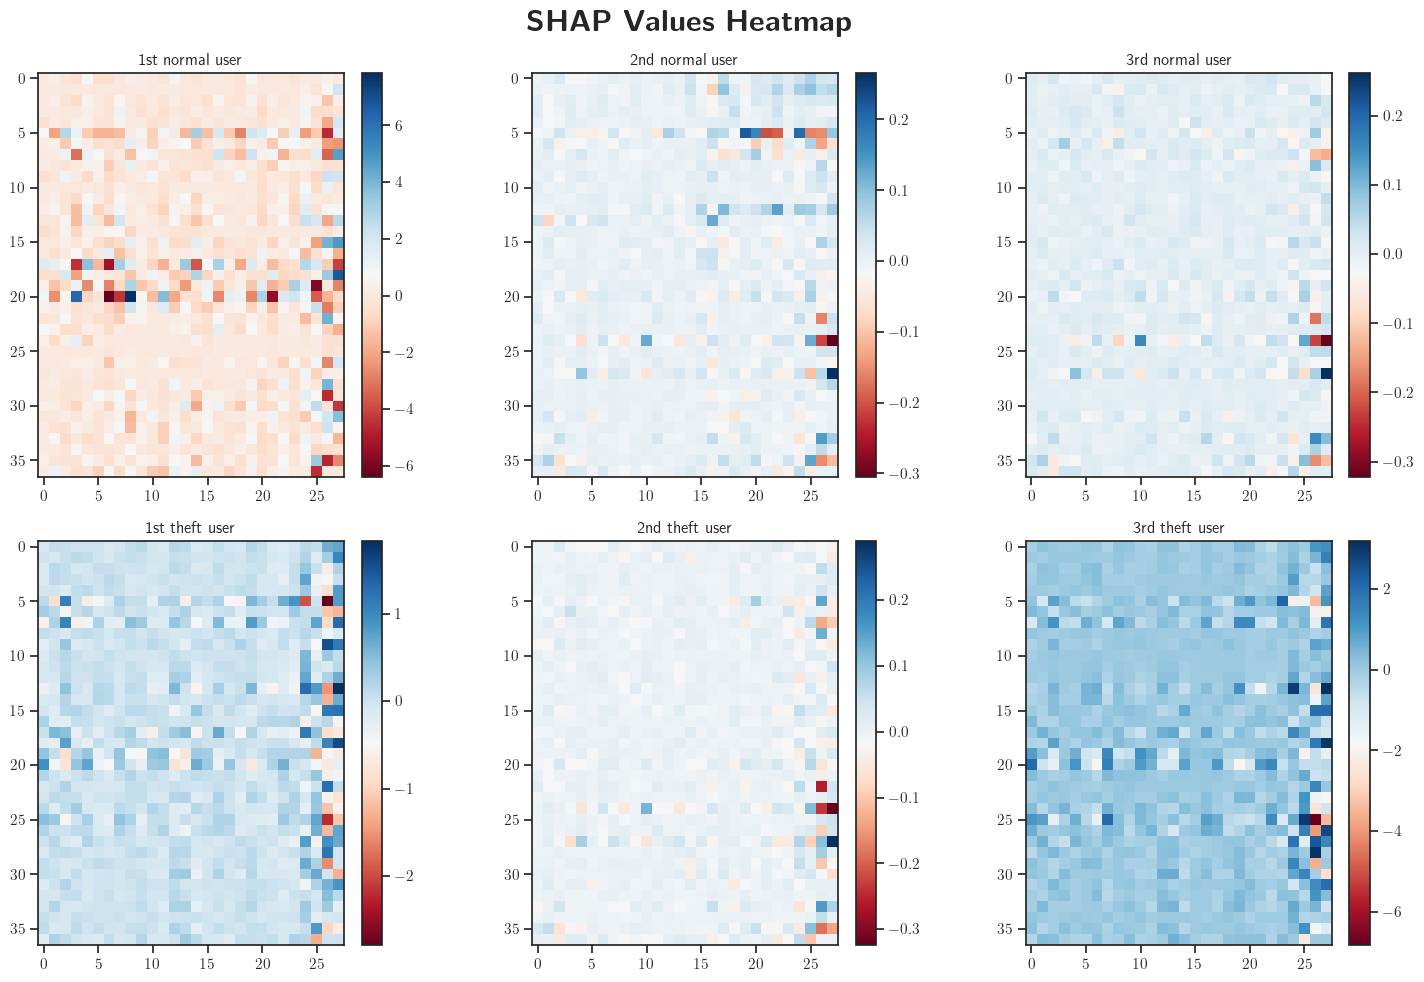

In [178]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the mean SHAP values for each feature
mean_shap_values_1 = np.mean(shap_values_1, axis=0)
mean_shap_values_2 = np.mean(shap_values_2, axis=0)
mean_shap_values_3 = np.mean(shap_values_3, axis=0)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

mean_values = np.mean(shap_values_1, axis=3)
print(mean_values.shape)

# Plot the mean SHAP values heatmap for each subplot
im1 = axes[0, 0].imshow(mean_values[0, :, :], cmap='RdBu')
axes[0, 0].set_title('1st normal user')

im2 = axes[0, 1].imshow(mean_values[1, :, :], cmap='RdBu')
axes[0, 1].set_title('2nd normal user')

im3 = axes[0, 2].imshow(mean_values[4, :, :], cmap='RdBu')
axes[0, 2].set_title('3rd normal user')

im4 = axes[1, 0].imshow(mean_values[9, :, :], cmap='RdBu')
axes[1, 0].set_title('1st theft user')

im5 = axes[1, 1].imshow(mean_values[5, :, :], cmap='RdBu')
axes[1, 1].set_title('2nd theft user')

im6 = axes[1, 2].imshow(mean_values[26, :, :], cmap='RdBu')
axes[1, 2].set_title('3rd theft user')

# Add a single colorbar for the entire figure
fig.colorbar(im1, ax=axes[0, 0], orientation='vertical', fraction=0.1, pad=0.04)
fig.colorbar(im2, ax=axes[0, 1], orientation='vertical', fraction=0.1, pad=0.04)
fig.colorbar(im3, ax=axes[0, 2], orientation='vertical', fraction=0.1, pad=0.04)
fig.colorbar(im4, ax=axes[1, 0], orientation='vertical', fraction=0.1, pad=0.04)
fig.colorbar(im5, ax=axes[1, 1], orientation='vertical', fraction=0.1, pad=0.04)
fig.colorbar(im6, ax=axes[1, 2], orientation='vertical', fraction=0.1, pad=0.04)

plt.suptitle(r'\textbf{SHAP Values Heatmap}', fontsize=22)
plt.tight_layout()
plt.show()

(32, 37, 28)


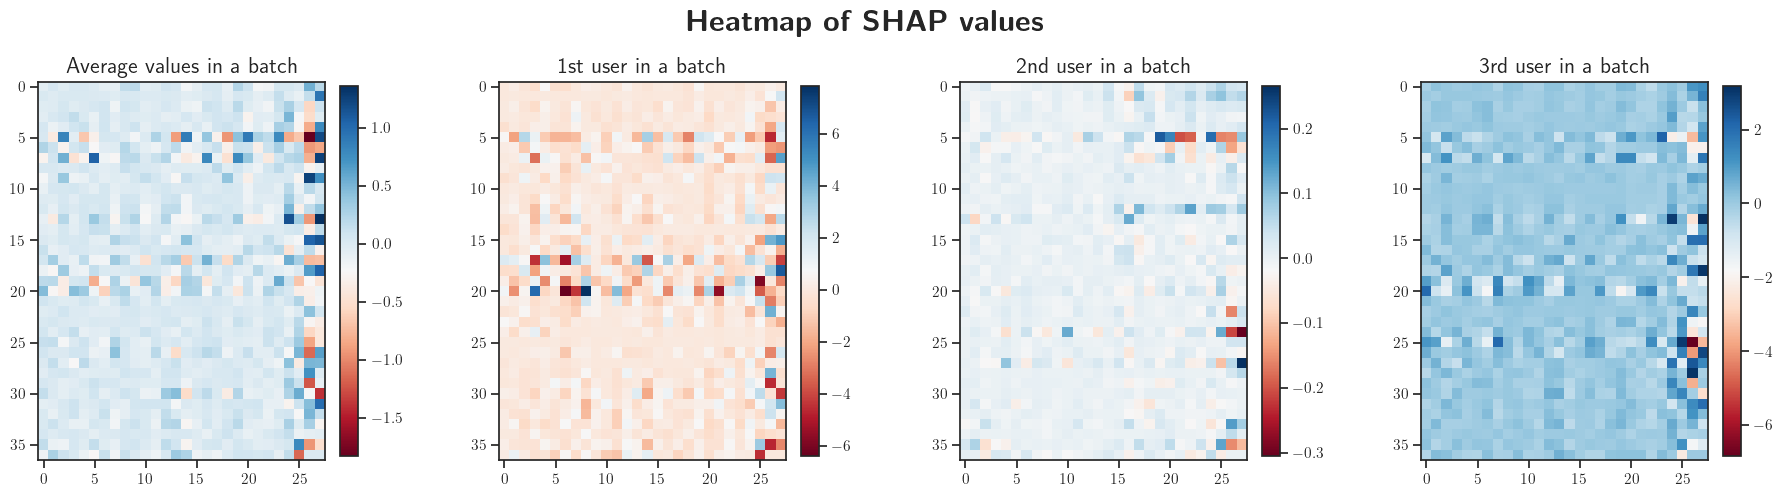

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(18.5, 5))

mean_values = np.mean(shap_values_1, axis=3)
print(mean_values.shape)

# Plot the mean SHAP values heatmap for each subplot
im1 = axes[0].imshow(np.mean(mean_values, axis=0), cmap='RdBu')
axes[0].set_title('Average values in a batch', fontsize=16)

im2 = axes[1].imshow(mean_values[0, :, :], cmap='RdBu')
axes[1].set_title('1st user in a batch', fontsize=16)

im3 = axes[2].imshow(mean_values[1, :, :], cmap='RdBu')
axes[2].set_title('2nd user in a batch', fontsize=16)

im4 = axes[3].imshow(mean_values[26, :, :], cmap='RdBu')
axes[3].set_title('3rd user in a batch', fontsize=16)

# Add a single colorbar for the entire figure
fig.colorbar(im1, ax=axes[0], orientation='vertical', fraction=0.05, pad=0.04)
fig.colorbar(im2, ax=axes[1], orientation='vertical', fraction=0.05, pad=0.04)
fig.colorbar(im3, ax=axes[2], orientation='vertical', fraction=0.05, pad=0.04)
fig.colorbar(im4, ax=axes[3], orientation='vertical', fraction=0.05, pad=0.04)

plt.suptitle(r'\textbf{Heatmap of SHAP values}', fontsize=22)
plt.tight_layout()
plt.show()

(37, 28, 2)
(37, 28)
(37,)


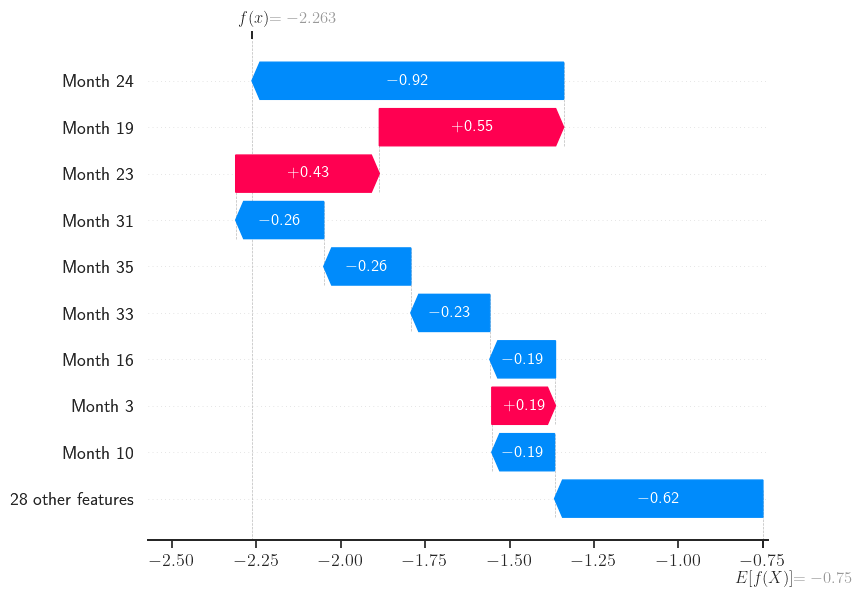

In [108]:
# Select the SHAP values for the first instance
single_instance_shap_values = shap_values[0]  # Shape will be (37, 28, 2)
print(single_instance_shap_values.shape)
print(mean_shap_values.shape)

# Select the SHAP values for the first class (assuming binary classification)
single_instance_shap_values = single_instance_shap_values[:, 0, 0]  # Shape will be (37,)
print(single_instance_shap_values.shape)

# Now call the waterfall plot function
# shap.plots._waterfall.waterfall_legacy(e.expected_value[0], mean_shap_values[:, 0], feature_names=month_features)

# Create the Explanation object
explanation = shap.Explanation(values=mean_shap_values[:, 0], base_values=e.expected_value[0], feature_names=month_features)

# Plot the waterfall plot
shap.waterfall_plot(explanation)

In [89]:
# Assuming shap_values[0] has shape (32, 37, 28, 2)
# Select the SHAP values for the first instance
shap.initjs()

single_instance_shap_values = shap_values[0]  # Shape will be (37, 28, 2)

# Select the SHAP values for the first class (assuming binary classification)
single_instance_shap_values = single_instance_shap_values[:, 0, 0]  # Shape will be (37,)

print(single_instance_shap_values.shape)

# Ensure the length of feature_names matches the length of single_instance_shap_values
assert len(single_instance_shap_values) == len(month_features), "Length of features is not equal to the length of shap_values!"

# Now call the force plot function
# shap.plots.force(e.expected_value[0], single_instance_shap_values, feature_names=month_features)

shap.force_plot(e.expected_value[0], single_instance_shap_values, feature_names=month_features)

(37,)


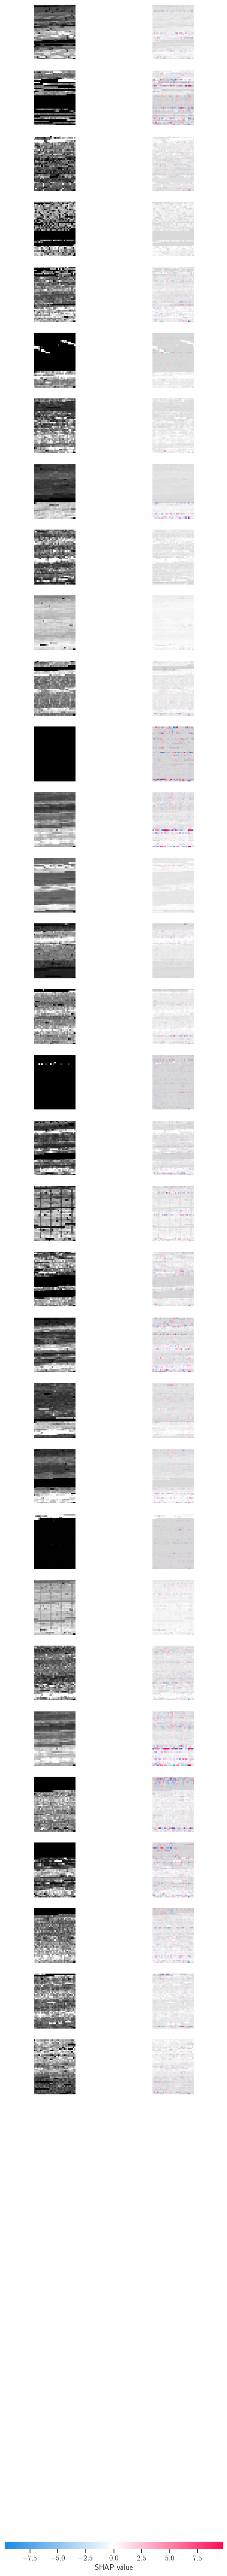

In [8]:
shap.image_plot(shap_values_g, test_data[:].detach().cpu().numpy())

# Display the plot
plt.show()

The mode using CAE component
Log mode:  train


/tmp/ipykernel_410410/1794004168.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('../model/KSM_Bestt/KSM_Bestt_model_179.pth')


TRAIN SIZE: 46642  TEST SIZE: 11660  SIZE: 58302  TRAIN RATIO: 80 %
MODE: cae  INDIR: ../data/ksm_transformer_best_result  WINDOW SIZE: 37  EPOCH: 300  BATCH SIZE: 32  LR: 0.0001
finish load data
False Negatives for each class:
Class 0.0: 0.0046
Class 1.0: 0.0117
[[5798   27]
 [  68 5767]]


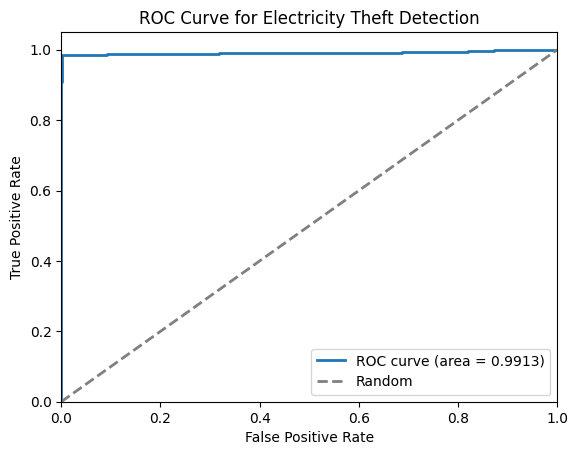

In [6]:
from config import Config, prepare_fin, parser_process
from data_loader import data_preparing
from sklearn.metrics import roc_curve, roc_auc_score, auc, confusion_matrix
import torch

def draw_confusion(label_y, pre_y):
    cm = confusion_matrix(label_y, pre_y)
    # Calculate the confusion matrix

    # Print False Negatives for each class
    print("False Negatives for each class:")
    for i, label in enumerate(set(label_y)):
        false_negatives = sum(cm[i, :]) - cm[i, i]
        true_positives = cm[i, i]
        if (false_negatives + true_positives) > 0:
            fnr = false_negatives / (false_negatives + true_positives)
        else:
            fnr = 0.0
        print(f"Class {label}: {fnr:.4f}")
    print(cm)

# Process arguments
args = parser_process()
config = Config(args)

model = torch.load('../model/KSM_Bestt/KSM_Bestt_model_179.pth')
config.root_dir = '../data/ksm_transformer_best_result'

# print(model)

train_loader, test_loader = data_preparing(config, args)

seed = 40
np.random.seed(seed)
torch.manual_seed(seed)

model.eval()
label_y = []
pre_y = []
prob_y = []

with torch.no_grad():
    for j, test_sample_batch in enumerate(test_loader):
        test_data = test_sample_batch['data'].type(torch.FloatTensor).to(config.device)
        test_label = test_sample_batch['label'].to(config.device)
        
        test_out = model(test_data)
        
        pre_y = np.concatenate([pre_y, torch.max(test_out, 1)[1].cpu().numpy()], 0)
        prob_y = np.concatenate([prob_y, torch.max(test_out, 1)[0].cpu().numpy()], 0)
        label_y = np.concatenate([label_y, test_label.cpu().numpy()], 0)
        
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(label_y, prob_y)
    # Calculate AUC score
    roc_auc = auc(fpr, tpr)
    draw_confusion(label_y, pre_y)
    
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Electricity Theft Detection')
    plt.legend(loc="lower right")
    plt.show()

In [59]:
from thop import profile
import time 

# Prepare data for SHAP
batch_1 = next(iter(test_loader))

train_batch_1 = next(iter(train_loader))

torch.cuda.empty_cache()

model = torch.load('../model/KSM_Bestt/KSM_Bestt_model_179.pth').to(config.device)
model.eval()

# Move data to the device
test_data_1, label_1 = batch_1['data'], batch_1['label']

train_data_1, train_label_1 = train_batch_1['data'], train_batch_1['label']

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
test_data_1 = test_data_1.to(device)
model = model.to(device)

# Warm up (for more accurate timing)
with torch.no_grad():
    _ = model(test_data_1)

# Time the inference
start_time = time.time()
with torch.no_grad():
    _ = model(test_data_1)
end_time = time.time()

print(f'Inference time: {end_time - start_time} seconds')

macs, params = profile(model, inputs=[test_data_1])
print('MACs (G): ', macs/1000**2)
print('Params (M): ', params/1000**2)

# summary(model, (37, 28))

Inference time: 0.015233993530273438 seconds
[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv1d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.dropout.Dropout'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.normalization.LayerNorm'>.
MACs (G):  1586.258176
Params (M):  0.685178


/tmp/ipykernel_393884/805361447.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('../model/KSM_Bestt/KSM_Bestt_model_179.pth').to(config.device)
